In [1]:
import yfinance as yf
import pandas as pd 
import ta
import matplotlib.pyplot as plt 
from pytickersymbols import PyTickerSymbols
from tqdm import tqdm

In [2]:
ticker = "BWA"
stock = yf.download(ticker, period = "10d", interval = "5m")
stock.to_csv("stock1.csv")
stock = pd.read_csv("stock1.csv")

[*********************100%***********************]  1 of 1 completed


Ticker: FTCH
[*********************100%***********************]  1 of 1 completed
-0.014318522024648783
-0.15631007832537347


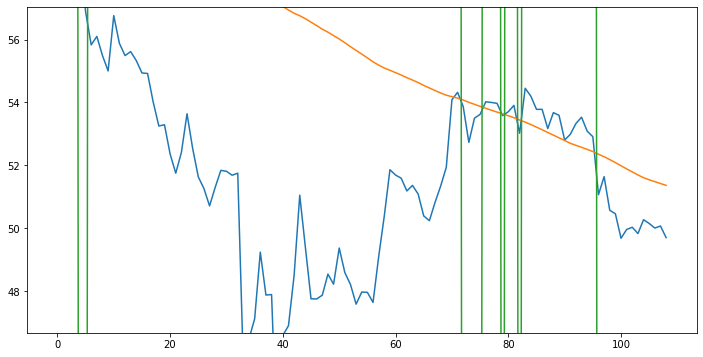

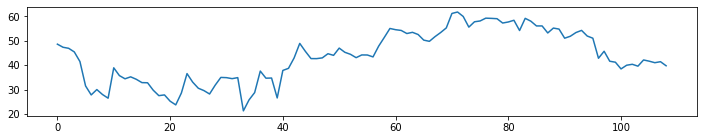

In [20]:
ticker = input("Ticker: ")
window = 20
stock = yf.download(ticker, period = "16d", interval = "30m")
stock.to_csv("stock1.csv")
stock = pd.read_csv("stock1.csv")
stock['r'] = stock['Close'].pct_change()
stock['ma100'] = stock['Close'].rolling(100).mean()
stock['RSI'] = ta.momentum.rsi(close = stock['Close'], window = window)
stock['buy'] = (((stock['Close'] > stock['ma100']).astype(int) + (stock['RSI'] < 30).astype(int))>0).astype(int)
stock['sell'] = (((((stock['Close'] < stock['ma100']).astype(int) + (stock['Close'].shift() >stock['ma100'])).astype(int) == 2).astype(int))+(stock['RSI']>70).astype(int)>0).astype(int)

stock = stock.dropna()
stock = stock.reset_index()

# calculate hold
stock['hold'] = stock['buy']
for i in range(1, len(stock)):
    if stock.loc[i-1, 'hold'] == 1:
        if stock.loc[i, 'buy'] == 1:
            stock.loc[i, 'hold'] = 1
        elif stock.loc[i, 'sell'] == 1:
            stock.loc[i, 'hold'] = 0
        else: 
            stock.loc[i, 'hold'] = 1
    else:
        if stock.loc[i, 'buy'] ==1:
            stock.loc[i, 'hold'] = 1
        elif stock.loc[i, 'sell'] == 1:
            stock.loc[i, 'hold'] = 0



# calculate strategy return 
stock['hold_r'] = stock['hold']*stock['r']

r = stock['hold_r'].sum()
r1 = stock['r'].sum()

print(r)
print(r1)

# if r > r1:
#     amount_better+=1 

# normal+=1

# returns[ticker] = r
# returns1[ticker] = r1
# maximum_hold.append(stock.hold.max())

x = len(stock)
y = stock.loc[x-50, 'Close']
plt.figure(figsize=(12, 6))
stock['Close'][x-x:x].plot()
stock['ma100'][x-x:x].plot()
stock['hold'] *= y*3
stock['hold'][x-x:x].plot()
axes = plt.gca()
axes.set_ylim([y*0.90, y*1.10])
plt.show()

plt.figure(figsize=(12, 2))
stock['RSI'][x-x:x].plot()
plt.show()

In [215]:
stock.head(60)

,index,Datetime,Open,High,Low,Close,Adj Close,Volume,r,ma100,RSI,buy,sell,hold,hold_r
0,99,2021-03-23 13:30:00-04:00,68.290001,68.330002,67.709999,67.889999,67.889999,178872,-0.005420,69.745352,35.249076,0,0,0.000000,-0.000000
1,100,2021-03-23 14:00:00-04:00,67.900002,67.970001,67.639999,67.650002,67.650002,118372,-0.003535,69.727652,33.871981,0,0,0.000000,-0.000000
2,101,2021-03-23 14:30:00-04:00,67.660004,67.730003,67.269997,67.300003,67.300003,152123,-0.005174,69.709252,31.955532,0,0,0.000000,-0.000000
3,102,2021-03-23 15:00:00-04:00,67.309998,67.650002,66.919998,67.379997,67.379997,205922,0.001189,69.688152,32.869322,0,0,0.000000,0.000000
4,103,2021-03-23 15:30:00-04:00,67.370003,67.550003,67.029999,67.500000,67.500000,497932,0.001781,69.666252,34.263346,0,0,0.000000,0.000000
5,104,2021-03-24 09:30:00-04:00,68.910004,70.290001,68.839996,70.059998,70.059998,643410,0.037926,69.672041,55.168631,1,0,240.389992,0.037926
6,105,2021-03-24 10:00:00-04:00,70.050003,70.839996,69.900002,70.830002,70.830002,321892,0.010991,69.686041,59.269692,1,0,240.389992,0.010991
7,106,2021-03-24 10:30:00-04:00,70.794998,70.989700,70.410004,70.964996,70.964996,191086,0.001906,69.699391,59.945869,1,0,240.389992,0.001906
8,107,2021-03-24 11:00:00-04:00,70.959999,71.029999,70.379997,70.750000,70.750000,214229,-0.003030,69.707991,58.322670,1,0,240.389992,-0.003030
9,108,2021-03-24 11:30:00-04:00,70.754997,71.000000,70.660004,70.864998,70.864998,127344,0.001625,69.720741,58.948529,1,0,240.389992,0.001625


In [107]:
def average(lst):
    return sum(lst)/len(lst)
    
print(average(returns.values()))
print(average(returns1.values()))

ZeroDivisionError: division by zero

In [349]:
stocks

['ADS.F',
 'ADDDF',
 'ADDYY',
 'ALV.F',
 'AZSEY',
 'ALIZY',
 'BAS.F',
 'BFFAF',
 'BASFY',
 'BAYN.F',
 'BAYZF',
 'BAYRY',
 'BEI.F',
 'BDRFY',
 'BMW.F',
 'BMWYY',
 'BMWB.F',
 'CON.F',
 'CTTAF',
 'CTTAY',
 '1COV.F',
 'COVTY',
 '1CO1.F',
 'DAI.F',
 'DDAIF',
 'DBK.F',
 'DB',
 'DB1.F',
 'DBOEY',
 'DPW.F',
 'DPSGY',
 'DTE.F',
 'DTEGF',
 'DTEGY',
 'EOAN.F',
 'ENAKF',
 'EONGY',
 'FME.F',
 'FMS',
 'FMCQF',
 'FRE.F',
 'FSNUY',
 'FSNUF',
 'HEI.F',
 'HLBZF',
 'HDELY',
 'HEN3.F',
 'HENKY',
 'HEN.F',
 'IFX.F',
 'IFNNF',
 'IFNNY',
 'LIN.F',
 'LIN',
 'MRK.F',
 'MKGAF',
 'MRKC.F',
 'MUV2.F',
 'MURGY',
 'RWE.F',
 'RWEOY',
 'SAP.F',
 'SAP',
 'SAPGF',
 'SIE.F',
 'SMAWF',
 'SIEGY',
 'SI',
 'VOW3.F',
 'VLKAF',
 'VWAGY',
 'VOW.F',
 'VNA.F',
 'VNNVF',
 'VONOY',
 'DHER.F',
 'DLVHF',
 'DWNI.F',
 'DTCWY',
 'MTX.F',
 'MTUAF',
 'MTUAY']

In [36]:
print(f'Close: {round(stock.iloc[-1, 4], 2)} MA100: {round(stock.iloc[-1,8], 2)} RSI: {round(stock.iloc[-1,9], 2)}')

Close: 49.8 MA100: 51.88 RSI: 39.14


In [35]:
stock.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,r,ma100,RSI,buy,sell,hold,hold_r
768,2021-04-05 10:00:00-04:00,51.110001,51.810001,50.740002,51.639999,51.639999,664615,0.011260,52.273508,45.717186,0,0,0,0.0
769,2021-04-05 10:30:00-04:00,51.639999,51.959999,50.320000,50.570000,50.570000,436457,-0.020720,52.181408,41.632516,0,1,0,-0.0
770,2021-04-05 11:00:00-04:00,50.544998,51.139999,50.419998,50.459999,50.459999,651225,-0.002175,52.087308,41.233841,0,0,0,-0.0
771,2021-04-05 11:30:00-04:00,50.450001,50.450001,49.450001,49.680000,49.680000,561502,-0.015458,51.984608,38.483206,0,0,0,-0.0
772,2021-04-05 12:00:00-04:00,49.700001,49.919998,49.320000,49.799999,49.799999,445402,0.002415,51.884908,39.140661,0,0,0,0.0


In [58]:
a = open('text.txt', 'w')
a.write(str(position))
a.close()

In [56]:
a = open('text.txt', 'w')
a.write("0")
a.close()

In [59]:
a = open('text.txt', 'r')
int(a.read())

10

In [51]:
position = 10 